In [52]:
# Dataset from : http://mrl.cs.vsb.cz/eyedataset

import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import glob
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import random
from sys import stdout

listAcc = np.array([])
falsePositive = np.array([])
falseNegative = np.array([])

nbImages = 1000

Analyzed 1000 images


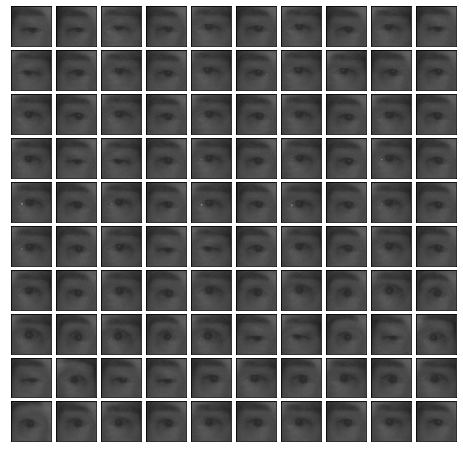

In [53]:
db = np.array([])
listeImg = list()

index = 0
for i in glob.glob('images/open/*.png',recursive=True) :
    if index == nbImages : break
    img = cv2.imread(i)
    img = cv2.resize(img, (100,100))
    listeImg.append(img)
    index = index + 1
    
db = np.asarray(listeImg)
    
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
subplot_kw={'xticks':[], 'yticks':[]},
gridspec_kw=dict(hspace=0.1, wspace=0.1))

print("Analyzed " + str(len(db)) + " images")
for i, ax in enumerate(axes.flat):
  ax.imshow(db[i], interpolation='nearest')

Analyzed 1000 images


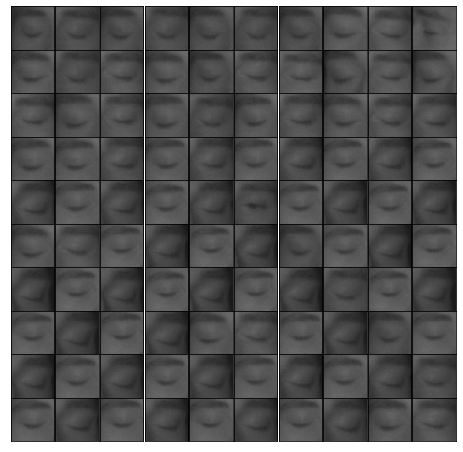

In [54]:
db = np.array([])
listeImg = list()

index = 0
for i in glob.glob('images/close/*.png',recursive=True) :
    if index == nbImages : break
    img = cv2.imread(i)
    img = cv2.resize(img, (100,100))
    listeImg.append(img)
    index = index + 1

db = np.asarray(listeImg)
    
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
subplot_kw={'xticks':[], 'yticks':[]},
gridspec_kw=dict(hspace=0, wspace=0))

print("Analyzed " + str(len(db)) + " images")
for i, ax in enumerate(axes.flat):
  ax.imshow(db[i], interpolation='nearest')

In [55]:
#########################################################################################################################
#                                                     ANALYSIS                                                           #
#########################################################################################################################

listImgEyeOpen = list()
listImgEyeClose = list()

for i in glob.glob('images/close/*.png',recursive=True) :
    img = cv2.imread(i,0)
    img = cv2.resize(img, (100,100))
    img = img.reshape(img.shape[0]*img.shape[1])
    listImgEyeOpen.append(img)
    
for i in glob.glob('images/open/*.png',recursive=True) :
    img = cv2.imread(i,0)
    img = cv2.resize(img, (100,100))
    img = img.reshape(img.shape[0]*img.shape[1])
    listImgEyeClose.append(img)
    
listEye = np.concatenate((listImgEyeClose, listImgEyeOpen), 0)

eyeClose = np.c_[listImgEyeClose, np.zeros(len(listImgEyeClose))]
eyeOpen = np.c_[listImgEyeOpen, np.ones(len(listImgEyeOpen))]

listEyeFinal = np.concatenate((eyeOpen,eyeClose), 0)

listImg2 = list()
for i in glob.glob('images/predictions/*.png',recursive=True):
    img = cv2.imread(i,0)
    img = cv2.resize(img, (100,100))
    img = img.reshape(img.shape[0]*img.shape[1])
    listImg2.append(img)
    
listImg2 = np.asarray(listImg2)
print("Image analysis finished")
#########################################################################################################################
#                                                    PREDICTION                                                         #
#########################################################################################################################
    

acc = 0
repetition = 5
KNN = KNeighborsClassifier()
print("Starting prediction ...")
for i in range(0, repetition):
    stdout.write("\rrepetition : "+str(i+1)+"/"+str(repetition))
    X_train, X_test, y_train, y_test = train_test_split(listEye, listEyeFinal[:,-1], test_size = 0.3,random_state=2*i)
    clf = KNN.fit(X_train, y_train)
    predictedY = clf.predict(X_test)
    
    listAcc = np.append(listAcc, accuracy_score(y_test, predictedY)) 
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictedY).ravel()
    falsePositive = np.append(falsePositive,fp)
    falseNegative = np.append(falseNegative,fn)
    stdout.flush()

stdout.write("\r\r\n")
print("--------------------------------------------------------------------------------")
print("Mean : " + str(np.mean(listAcc)))
print("Standard deviation : "+str(np.var(listAcc)))

Image analysis finished
Starting prediction ...
repetition : 5/5
--------------------------------------------------------------------------------
Mean : 0.9803333333333335
Standard deviation : 5.166666666666557e-06


239 images to predict


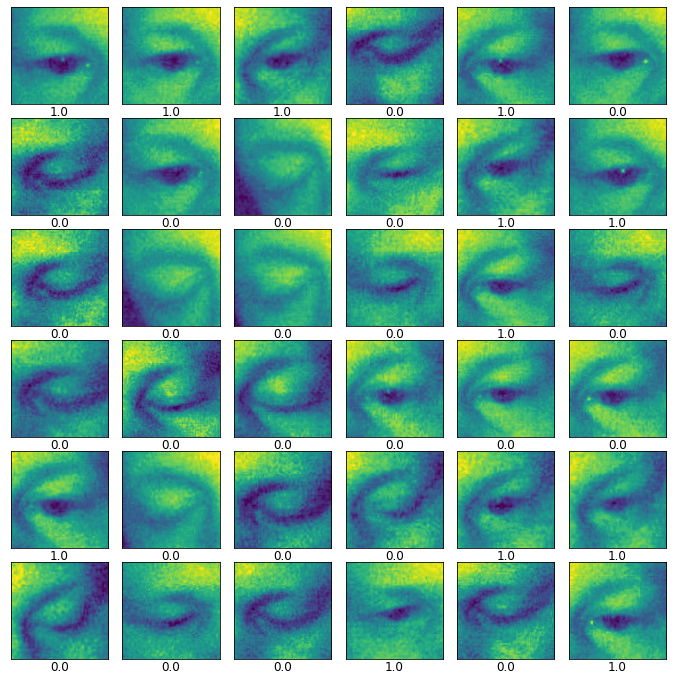

In [57]:
#########################################################################################################################
#                                                  DISPLAY IMAGES                                                       #
#########################################################################################################################

X_test, y_test = train_test_split(listImg2, test_size =1)
predictedY = clf.predict(X_test)

fig, axes = plt.subplots(6, 6, figsize=(12, 12),
subplot_kw={'xticks':[], 'yticks':[]},
gridspec_kw=dict(hspace=0.14, wspace=0))
print(str(len(predictedY)) + " images to predict")
for i, ax in enumerate(axes.flat):
    imgReshape = np.reshape(X_test[i], (-1, 100))
    ax.imshow(imgReshape, interpolation='nearest')
    ax.set_title(predictedY[i], y=-0.18)    


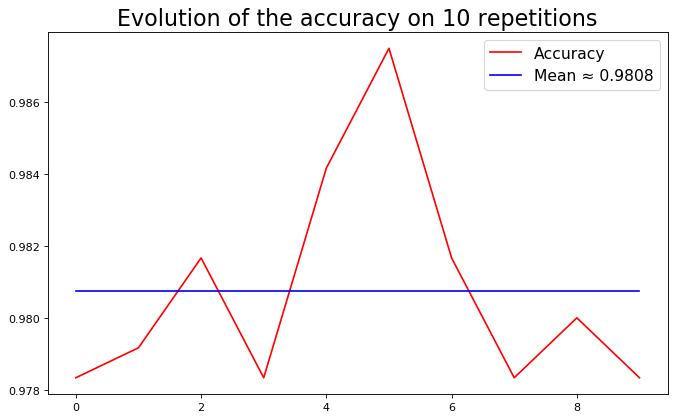

In [47]:
#########################################################################################################################
#                                              EVOLUTION MEAN                                                           #
#########################################################################################################################
from matplotlib.pyplot import figure

figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

donnees, = plt.plot(listAcc, 'r', label="test") 
moyenne, =plt.plot(np.full(listAcc.shape[0], np.mean(listAcc)), 'b', label="test2")

plt.legend([donnees,moyenne],["Accuracy", "Mean ≈ "+str(round(np.mean(listAcc),4))], fontsize=14)
plt.title("Evolution of the accuracy on "+str(repetition)+" repetitions", fontsize=20)
plt.show()

In [14]:
#########################################################################################################################
#                                                    NB VALEURS                                                         #
#########################################################################################################################

counter1 = 0
counter2 = 0

for i in glob.glob('images/open/*.png',recursive=True) :
    counter1 = counter1+1

for i in glob.glob('images/close/*.png',recursive=True) :
    counter2 = counter2+1

print("Open : "+str(counter1))
print("Close :"+str(counter2))
print("Total :"+str(counter2+counter1))


Ouverts : 2000
Fermés :2000
Total :4000


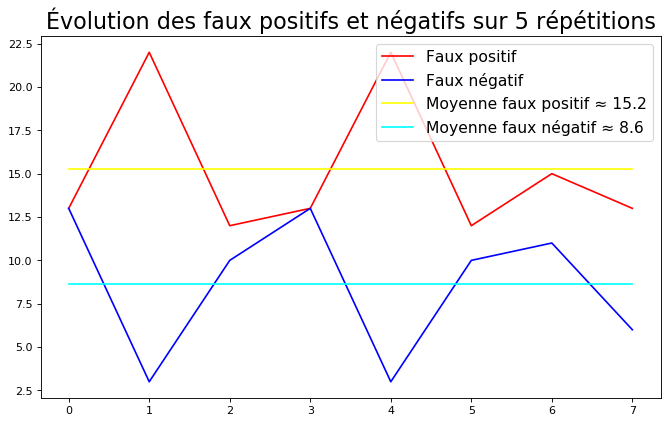

In [15]:
#########################################################################################################################
#                                            EVOLUTION FALSE POSITIVE/NEGATIVE                                          #
#########################################################################################################################
from matplotlib.pyplot import figure

# False positive in our case: we predicted an open eye when it had to be closed
# False negative in our case: we predicted a close eye when it had to be opened


figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

fp, = plt.plot(falsePositive, 'r') 
fn, = plt.plot(falseNegative, 'b') 

fpm, = plt.plot(np.full(falsePositive.shape[0], np.mean(falsePositive)), 'yellow') 
fnm, = plt.plot(np.full(falseNegative.shape[0], np.mean(falseNegative)), 'cyan') 

plt.legend([fp,fn,fpm, fnm],["False positive", "False negative", "Mean false positive ≈ "+str(round(np.mean(falsePositive),1)), "Mean false negative ≈ "+str(round(np.mean(falseNegative),1))], fontsize=14)
plt.title("Evolution of false positive and negative on "+str(repetition)+" repetitions", fontsize=20)
plt.show()